In [130]:
import pandas as pd
df = pd.read_csv("taxi_trip_pricing.csv")
df


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [88]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [63]:
col = [df.columns]
type(col)
col

[Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
        'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
        'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
       dtype='object')]

In [64]:
for i in col:
    print(i)

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')


In [131]:
# Example DataFrame


# Replace NaN values in categorical columns with the least common value
def fill_least_common(series):
    if series.dtype == 'object' or pd.api.types.is_categorical_dtype(series):
        value_counts = series.value_counts(dropna=True)
        if not value_counts.empty:
            least_common_value = value_counts.idxmin()
            return series.fillna(least_common_value)
    return series

# Replace NaN values in float columns with the mean
def fill_with_mean(series):
    if pd.api.types.is_float_dtype(series):
        mean_value = series.mean()
        return series.fillna(mean_value)
    return series

# Apply the transformations
for column in df.columns:
    if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
        df[column] = fill_least_common(df[column])
    elif pd.api.types.is_float_dtype(df[column]):
        df[column] = fill_with_mean(df[column])

print("Modified DataFrame:")
df.info()

Modified DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [90]:
df.head(30)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.000000,Low,Clear,3.560000,0.800000,0.320000,53.820000,36.262400
1,47.590000,Afternoon,Weekday,1.000000,High,Clear,3.502989,0.620000,0.430000,40.570000,56.874773
2,36.870000,Evening,Weekend,1.000000,High,Clear,2.700000,1.210000,0.150000,37.270000,52.903200
3,30.330000,Evening,Weekday,4.000000,Low,Snow,3.480000,0.510000,0.150000,116.810000,36.469800
4,27.070547,Evening,Weekday,3.000000,High,Clear,2.930000,0.630000,0.320000,22.640000,15.618000
5,8.640000,Afternoon,Weekend,2.000000,Medium,Clear,2.550000,1.710000,0.480000,89.330000,60.202800
6,3.850000,Afternoon,Weekday,4.000000,High,Rain,3.510000,1.660000,0.292916,5.050000,11.264500
7,43.440000,Evening,Weekend,3.000000,High,Clear,2.970000,1.870000,0.230000,62.118116,101.121600
8,30.450000,Morning,Weekday,3.000000,High,Clear,2.770000,1.780000,0.340000,110.330000,56.874773
9,35.700000,Afternoon,Weekday,2.000000,Low,Rain,3.390000,1.520000,0.470000,62.118116,75.565700


In [132]:
df["Passenger_Count"] = df["Passenger_Count"].round(0)
df["Passenger_Count"]

0      3.0
1      1.0
2      1.0
3      4.0
4      3.0
      ... 
995    4.0
996    4.0
997    3.0
998    1.0
999    3.0
Name: Passenger_Count, Length: 1000, dtype: float64

In [133]:
# Save df
df.to_csv("taxi_trip_pricing_clean.csv", index=False)
df = pd.read_csv("taxi_trip_pricing_clean.csv")
df.shape

(1000, 11)

In [134]:
import matplotlib.pyplot as plt

In [33]:
#outliers for realistic preprocessing challenges.
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.400775,1.074311,0.848107,0.418922,0.112662,31.339413,39.464810
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.107500,2.000000,2.770000,0.870000,0.197500,37.107500,34.578850
50%,26.995000,2.476842,3.502989,1.233316,0.292916,62.118116,52.617000
75%,37.782500,3.000000,4.202500,1.580000,0.382500,87.775000,67.476650
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


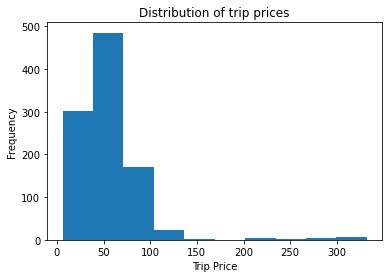

In [34]:
# Use Matplotlib to create histogram of "Trip_Price"

plt.hist(df["Trip_Price"])
plt.xlabel("Trip Price")
plt.ylabel("Frequency")
plt.title("Distribution of trip prices");

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


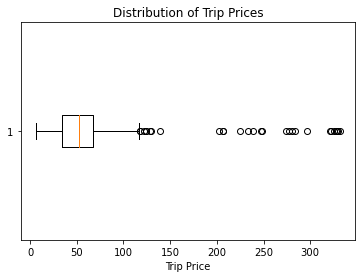

In [36]:
# Looking at our histogram, we can see that trip prices skews right. 
# In other words, there are more prices at the lower end of the distribution than at the higher end 
#That explains the difference between the mean and the median.
# Use Matplotlib to create boxplot of "area_m2"

plt.boxplot(df["Trip_Price"],vert=False)

# Add x-axis label
plt.xlabel("Trip Price")

# Add title
plt.title("Distribution of Trip Prices");

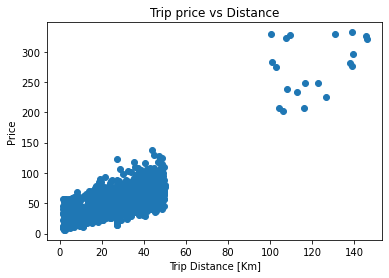

In [9]:
# There are outliers in the trip fares 
# This could be understood by checking relationships between the variables using correlation

# Create scatter plot of "Trip_Price" vs "Trip_Distance_km"
plt.scatter(x=df["Trip_Distance_km"],y=df["Trip_Price"])

# Add x-axis label
plt.xlabel("Trip Distance [Km]")

# Add y-axis label
plt.ylabel("Price")

# Add title
plt.title("Trip price vs Distance");

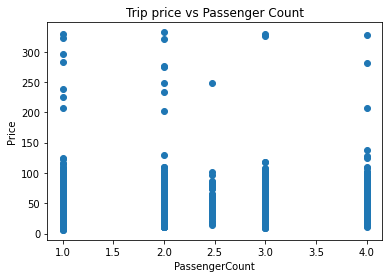

In [10]:
# Create scatter plot of "Trip_Price" vs "Trip_Distance_km"
plt.scatter(x=df["Passenger_Count"],y=df["Trip_Price"])

# Add x-axis label
plt.xlabel("PassengerCount")

# Add y-axis label
plt.ylabel("Price")

# Add title
plt.title("Trip price vs Passenger Count");

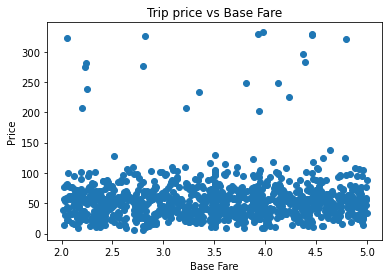

In [11]:
# Create scatter plot of "Trip_Price" vs "Trip_Distance_km"
plt.scatter(x=df["Base_Fare"],y=df["Trip_Price"])

# Add x-axis label
plt.xlabel("Base Fare")

# Add y-axis label
plt.ylabel("Price")

# Add title
plt.title("Trip price vs Base Fare");

In [135]:
# Function to remove outliers using the IQR method
import numpy as np
df = pd.read_csv('taxi_trip_pricing_clean.csv')


def remove_outliers(df, columns, iqr_multiplier=1.5):
    """
    Removes outliers from specified columns based on the IQR method.
    Args:
        df: The DataFrame.
        columns: List of numerical columns to analyze.
        iqr_multiplier: Determines the range for detecting outliers (default is 1.5).
    Returns:
        DataFrame with outliers removed.
    """
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)  # First quartile
            Q3 = df[col].quantile(0.75)  # Third quartile
            IQR = Q3 - Q1  # Interquartile range
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove outliers
df_cleaned = remove_outliers(df, numerical_columns)

print("\nDataFrame after removing outliers:")
df_cleaned.shape


DataFrame after removing outliers:


(970, 11)

In [136]:
# Save df
df_cleaned.to_csv("taxi_trip_pricing_minus_outlier.csv", index=False)
df = pd.read_csv("taxi_trip_pricing_minus_outlier.csv")
df.shape

(970, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       970 non-null    float64
 1   Time_of_Day            970 non-null    object 
 2   Day_of_Week            970 non-null    object 
 3   Passenger_Count        970 non-null    float64
 4   Traffic_Conditions     970 non-null    object 
 5   Weather                970 non-null    object 
 6   Base_Fare              970 non-null    float64
 7   Per_Km_Rate            970 non-null    float64
 8   Per_Minute_Rate        970 non-null    float64
 9   Trip_Duration_Minutes  970 non-null    float64
 10  Trip_Price             970 non-null    float64
dtypes: float64(7), object(4)
memory usage: 83.5+ KB
None
       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        970.000000       970.000000  970.000000   970.000000   
mean          24.977110

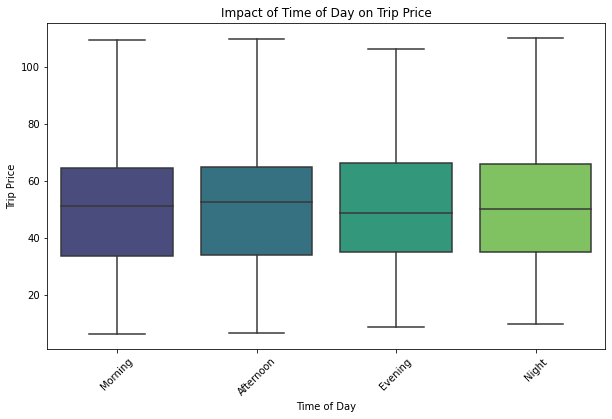

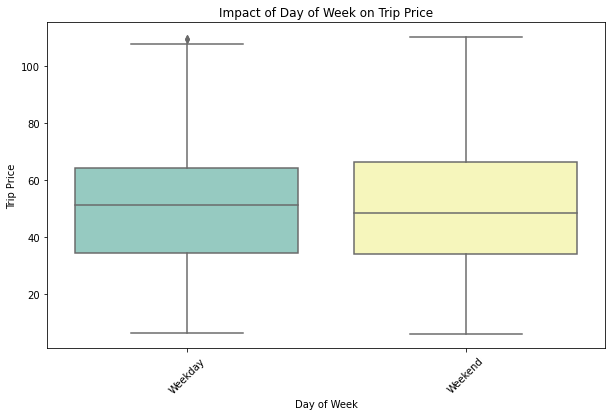

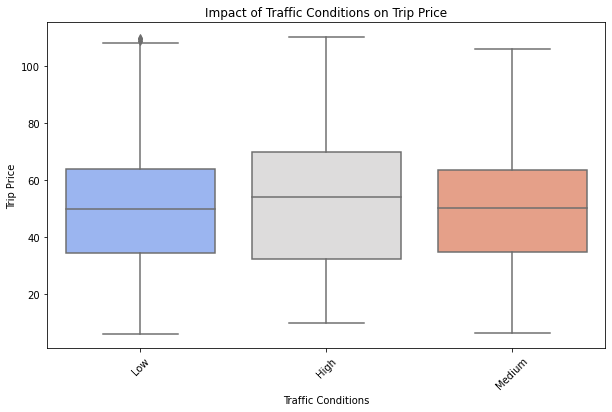

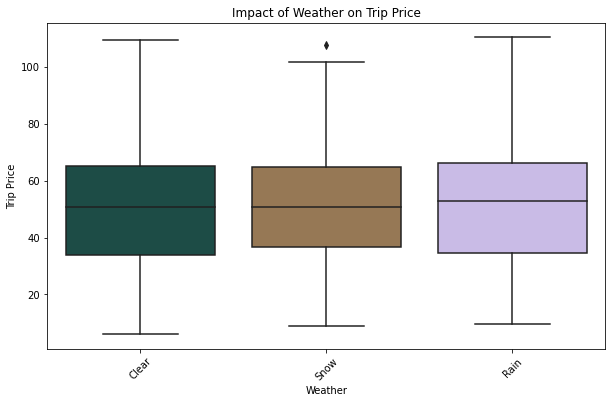

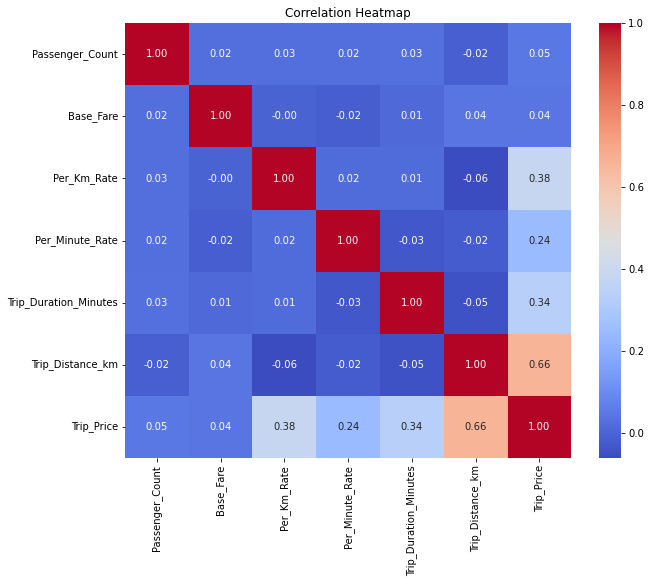

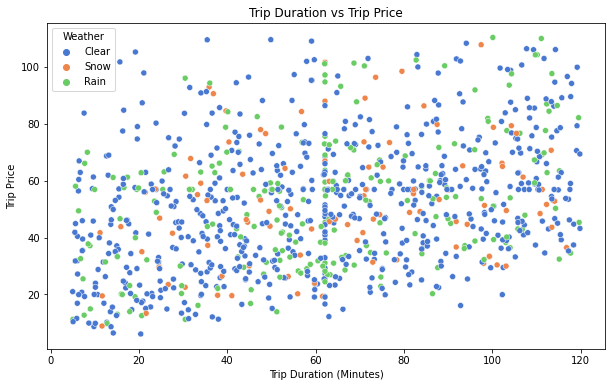

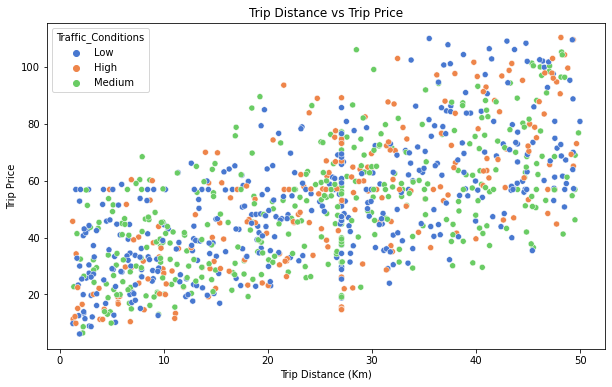

<Figure size 432x288 with 0 Axes>

In [96]:

import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('taxi_trip_pricing_minus_outlier.csv')

# Quick dataset overview
print(df.info())
print(df.describe())

# Analyze the impact of Time_of_Day on Trip_Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time_of_Day', y='Trip_Price', data=df, palette='viridis')
plt.title('Impact of Time of Day on Trip Price')
plt.xlabel('Time of Day')
plt.ylabel('Trip Price')
plt.xticks(rotation=45)
plt.show()

# Analyze the impact of Day_of_Week on Trip_Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y='Trip_Price', data=df, palette='Set3')
plt.title('Impact of Day of Week on Trip Price')
plt.xlabel('Day of Week')
plt.ylabel('Trip Price')
plt.xticks(rotation=45)
plt.show()

# Analyze the impact of Traffic_Conditions on Trip_Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic_Conditions', y='Trip_Price', data=df, palette='coolwarm')
plt.title('Impact of Traffic Conditions on Trip Price')
plt.xlabel('Traffic Conditions')
plt.ylabel('Trip Price')
plt.xticks(rotation=45)
plt.show()

# Analyze the impact of Weather on Trip_Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Trip_Price', data=df, palette='cubehelix')
plt.title('Impact of Weather on Trip Price')
plt.xlabel('Weather')
plt.ylabel('Trip Price')
plt.xticks(rotation=45)
plt.show()

# Correlation between numerical fields
numeric_cols = ['Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 
                'Trip_Duration_Minutes', 'Trip_Distance_km', 'Trip_Price']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot to explore relationships between Trip_Duration_Minutes, Trip_Distance_km, and Trip_Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trip_Duration_Minutes', y='Trip_Price', hue='Weather', data=df, palette='muted')
plt.title('Trip Duration vs Trip Price')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Trip Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', hue='Traffic_Conditions', data=df, palette='muted')
plt.title('Trip Distance vs Trip Price')
plt.xlabel('Trip Distance (Km)')
plt.ylabel('Trip Price')
plt.show()
plt.savefig('example_plot.png', dpi=300, bbox_inches='tight')


  Traffic_Conditions Weather  Trip_Price
0                Low   Clear   36.262400
1               High   Clear   56.874773
2               High   Clear   52.903200
3                Low    Snow   36.469800
4               High   Clear   15.618000


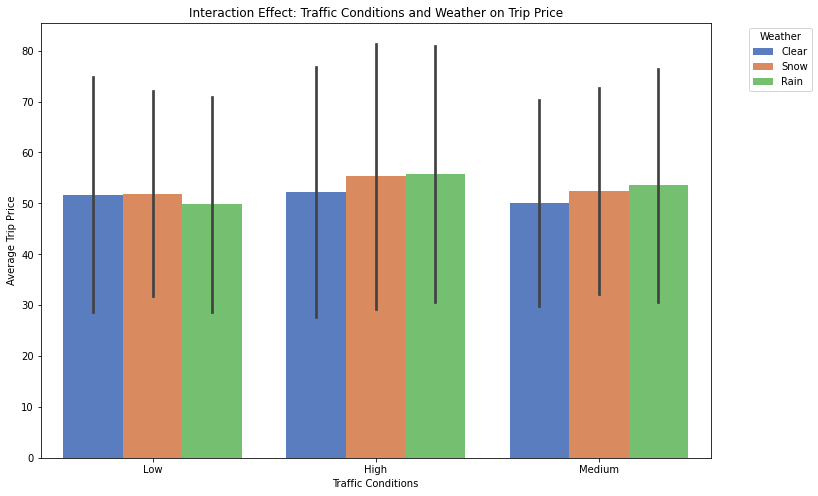


Average Trip Price Interaction Table:
Weather                 Clear       Rain       Snow
Traffic_Conditions                                 
High                52.260263  55.829226  55.358025
Low                 51.682086  49.795662  51.915951
Medium              50.083576  53.513660  52.372783


In [73]:
#To analyze the interaction effects between Traffic_Conditions and Weather on Trip_Price, 
# we can explore the combined influence of these two categorical variables on the target variable. 


# Overview of the data
print(df[['Traffic_Conditions', 'Weather', 'Trip_Price']].head())

# Create a grouped bar plot to show the combined effect of Traffic_Conditions and Weather on Trip_Price
plt.figure(figsize=(12, 8))
sns.barplot(x='Traffic_Conditions', y='Trip_Price', hue='Weather', data=df, ci='sd', palette='muted')
plt.title('Interaction Effect: Traffic Conditions and Weather on Trip Price')
plt.xlabel('Traffic Conditions')
plt.ylabel('Average Trip Price')
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Create a pivot table to explore average prices
interaction_pivot = df.pivot_table(values='Trip_Price', 
                                   index='Traffic_Conditions', 
                                   columns='Weather', 
                                   aggfunc='mean')
print("\nAverage Trip Price Interaction Table:")
print(interaction_pivot)



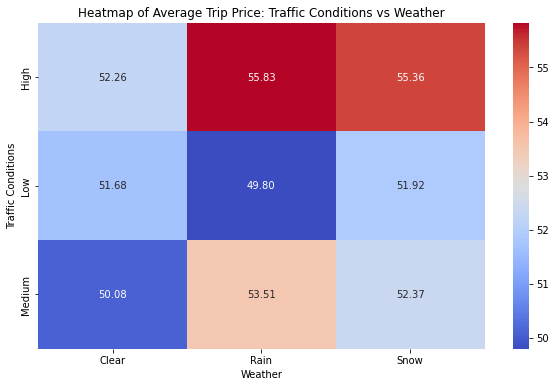

In [74]:
# Heatmap to visualize the interaction effect
plt.figure(figsize=(10, 6))
sns.heatmap(interaction_pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Average Trip Price: Traffic Conditions vs Weather')
plt.xlabel('Weather')
plt.ylabel('Traffic Conditions')
plt.show()


In [75]:
# two-way ANOVA test to statistically verify if the interaction between 
# Traffic_Conditions and Weather has a significant effect on Trip_Price.

import statsmodels.api as sm
from statsmodels.formula.api import ols


# Quick check to confirm the data structure
print(df[['Traffic_Conditions', 'Weather', 'Trip_Price']].head())

# Ensure Traffic_Conditions and Weather are treated as categorical variables
df['Traffic_Conditions'] = df['Traffic_Conditions'].astype('category')
df['Weather'] = df['Weather'].astype('category')

# Two-Way ANOVA: Main Effects and Interaction Effects
formula = 'Trip_Price ~ C(Traffic_Conditions) + C(Weather) + C(Traffic_Conditions):C(Weather)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("Two-Way ANOVA Results:")
print(anova_table)




  Traffic_Conditions Weather  Trip_Price
0                Low   Clear   36.262400
1               High   Clear   56.874773
2               High   Clear   52.903200
3                Low    Snow   36.469800
4               High   Clear   15.618000
Two-Way ANOVA Results:
                                         sum_sq     df         F    PR(>F)
C(Traffic_Conditions)                770.710311    2.0  0.760433  0.467745
C(Weather)                           453.787276    2.0  0.447736  0.639206
C(Traffic_Conditions):C(Weather)    1148.061678    4.0  0.566376  0.687113
Residual                          486993.875947  961.0       NaN       NaN


In [48]:
df.shape

(970, 11)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Trip_Distance_km       970 non-null    float64 
 1   Time_of_Day            970 non-null    object  
 2   Day_of_Week            970 non-null    object  
 3   Passenger_Count        970 non-null    float64 
 4   Traffic_Conditions     970 non-null    category
 5   Weather                970 non-null    category
 6   Base_Fare              970 non-null    float64 
 7   Per_Km_Rate            970 non-null    float64 
 8   Per_Minute_Rate        970 non-null    float64 
 9   Trip_Duration_Minutes  970 non-null    float64 
 10  Trip_Price             970 non-null    float64 
dtypes: category(2), float64(7), object(2)
memory usage: 70.5+ KB


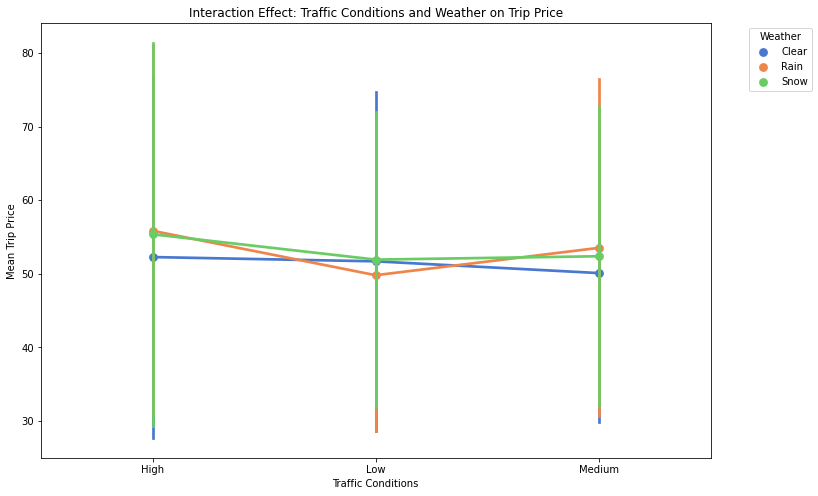

In [49]:
# Visualize the interaction effect
plt.figure(figsize=(12, 8))
sns.pointplot(x='Traffic_Conditions', y='Trip_Price', hue='Weather', data=df, ci='sd', palette='muted')
plt.title('Interaction Effect: Traffic Conditions and Weather on Trip Price')
plt.xlabel('Traffic Conditions')
plt.ylabel('Mean Trip Price')
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [151]:
#Building regression models and comparing their performance.
# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# For scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
# For training the Linear Regression model
from sklearn.linear_model import LinearRegression

# For evaluating the model
from sklearn.metrics import mean_squared_error,r2_score

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Trip_Distance_km       970 non-null    float64 
 1   Time_of_Day            970 non-null    object  
 2   Day_of_Week            970 non-null    object  
 3   Passenger_Count        970 non-null    float64 
 4   Traffic_Conditions     970 non-null    category
 5   Weather                970 non-null    category
 6   Base_Fare              970 non-null    float64 
 7   Per_Km_Rate            970 non-null    float64 
 8   Per_Minute_Rate        970 non-null    float64 
 9   Trip_Duration_Minutes  970 non-null    float64 
 10  Trip_Price             970 non-null    float64 
dtypes: category(2), float64(7), object(2)
memory usage: 70.5+ KB


In [138]:
#Label encoding for categorical fields
from sklearn.preprocessing import LabelEncoder

In [ ]:
#data['Day_of_Week',"Time_of_Day","Traffic_Conditions","Weather"] = label_encoder.fit_transform(data['Category'])

In [139]:
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Day_of_Week',"Time_of_Day","Traffic_Conditions","Weather"]

# Apply Label Encoding to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [102]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,2,0,3.0,1,0,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,0,0,1.0,0,0,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,1,1,1.0,0,0,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,1,0,4.0,1,2,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,1,0,3.0,0,0,2.930000,0.63,0.32,22.64,15.618000


In [140]:
X = df.drop(columns=["Trip_Price"])
y = df["Trip_Price"]

In [104]:
X.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.350000,2,0,3.0,1,0,3.560000,0.80,0.32,53.82
1,47.590000,0,0,1.0,0,0,3.502989,0.62,0.43,40.57
2,36.870000,1,1,1.0,0,0,2.700000,1.21,0.15,37.27
3,30.330000,1,0,4.0,1,2,3.480000,0.51,0.15,116.81
4,27.070547,1,0,3.0,0,0,2.930000,0.63,0.32,22.64


In [106]:
X.shape

(970, 10)

In [105]:
y.head()

0    36.262400
1    56.874773
2    52.903200
3    36.469800
4    15.618000
Name: Trip_Price, dtype: float64

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [153]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [154]:
rf_model.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [155]:
y_prediction = rf_model.predict(X_test_scaled)

In [156]:
mse1 = mean_squared_error(y_test,y_prediction)
r21 = r2_score(y_test,y_prediction)

In [157]:
mse1

68.80334161141495

In [158]:
r21

0.8625037342026175

In [143]:
model = LinearRegression()

In [144]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [145]:
y_prediction = model.predict(X_test_scaled)

In [146]:
mse = mean_squared_error(y_test,y_prediction)
r2 = r2_score(y_test,y_prediction)

In [147]:
print(mse)

93.41636768530829


In [148]:
print(r2)

0.8133171816911551


In [123]:
import pandas as pd

# Assuming y_test and y_pred are already defined
# Convert y_test to a DataFrame and reset the index for alignment
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_prediction, columns=['Predicted'])

# Combine the two DataFrames
results_df = pd.concat([y_test_df, y_pred_df], axis=1)
results_df.columns = ['Actual', 'Predicted']

print(results_df)

       Actual  Predicted
0     12.6264  -0.015358
1     29.5584  44.838228
2    102.7246  90.490285
3     20.0527  24.667019
4     92.8432  82.854967
..        ...        ...
189   51.8548  55.465054
190   23.3579  33.769241
191   52.9218  51.466287
192   54.1018  59.543924
193   57.2800  70.809367

[194 rows x 2 columns]


In [122]:
pred


,575,259,388,495,70,906,785,485,88,548,...,919,323,921,597,318,964,745,893,33,31
Trip_Price,12.6264,29.5584,102.7246,20.0527,92.843200,29.9812,46.9056,63.615,40.416500,23.279,...,41.0174,71.095,55.5074,44.4294,41.544,51.8548,23.3579,52.9218,54.10180,57.280000
Unnamed 0,NaN,NaN,NaN,NaN,59.156208,NaN,NaN,NaN,53.160493,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.22816,42.072677
